## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
raw_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
raw_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(raw_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = raw_data[raw_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# see above

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = raw_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(raw_data['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_data = data.groupby('Drug Regimen')
grouped_mean = grouped_data['Tumor Volume (mm3)'].mean()
grouped_median = grouped_data['Tumor Volume (mm3)'].median()
grouped_var = grouped_data['Tumor Volume (mm3)'].var()
grouped_std = grouped_data['Tumor Volume (mm3)'].std()
grouped_SEM = grouped_data['Tumor Volume (mm3)'].sem()


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

merged = pd.merge(grouped_mean, grouped_median, on = 'Drug Regimen')
merged = merged.rename(columns={'Tumor Volume (mm3)_x': 'Mean Tumor Size', 'Tumor Volume (mm3)_y': 'Median Tumor Size'})
merged = pd.merge(merged, grouped_var, on = 'Drug Regimen')
merged = pd.merge(merged, grouped_std, on = 'Drug Regimen')
merged = merged.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Size Variance', 'Tumor Volume (mm3)_y': 'Tumor Size St.Dev'})
merged = pd.merge(merged, grouped_SEM, on = 'Drug Regimen')
merged = merged.rename(columns={'Tumor Volume (mm3)': 'Tumor Size Std Err'})
merged



,Mean Tumor Size,Median Tumor Size,Tumor Size Variance,Tumor Size St.Dev,Tumor Size Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Using the aggregation method, produce the same summary statistics in a single line

grouped_volume = grouped_data['Tumor Volume (mm3)']
aggregate_volume = grouped_volume.agg(['mean', 'median','var','std','sem'])
aggregate_volume

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

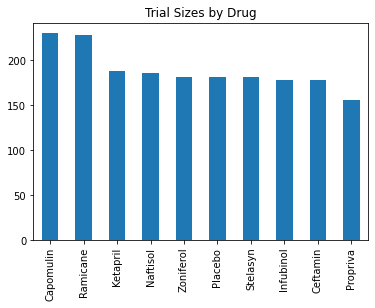

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

data['Drug Regimen'].value_counts().plot(kind = 'bar', title = 'Trial Sizes by Drug')

Text(0, 0.5, 'Number of Measurements')

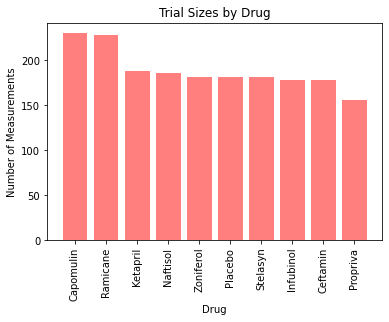

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(grouped_data))
tick_locations = [value for value in x_axis]
df = data['Drug Regimen'].value_counts().rename_axis('Drug Regimen').reset_index(name='counts')
plt.bar(x_axis, data["Drug Regimen"].value_counts(), color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, df["Drug Regimen"], rotation="vertical")
plt.title("Trial Sizes by Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurements")


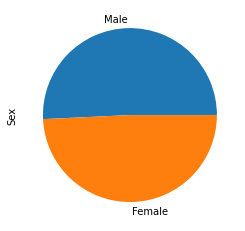

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

data['Sex'].value_counts().plot(kind = 'pie')

([<matplotlib.patches.Wedge at 0x19178b0e4f0>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

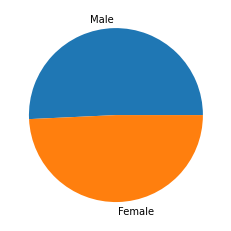

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = data['Sex'].unique()
plt.pie(data['Sex'].value_counts(), labels = labels)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastdata = data.drop_duplicates(subset=['Mouse ID'], keep='last')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finaldata = pd.merge(data, lastdata[['Mouse ID', 'Tumor Volume (mm3)']], on = 'Mouse ID')
finaldata = finaldata.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume', 'Tumor Volume (mm3)_y': 'Tumor Volume Final'})
finaldata.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites,Tumor Volume Final
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
5,k403,Ramicane,Male,21,16,25,33.464577,1,22.050126
6,k403,Ramicane,Male,21,16,30,31.099498,1,22.050126
7,k403,Ramicane,Male,21,16,35,26.546993,1,22.050126
8,k403,Ramicane,Male,21,16,40,24.365505,1,22.050126
9,k403,Ramicane,Male,21,16,45,22.050126,1,22.050126


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = data['Drug Regimen'].unique().tolist()
print(treatments)

# Create empty list to fill with tumor vol data (for plotting)
volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = finaldata['Tumor Volume Final'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
   
    
    # Determine outliers using upper and lower bounds
outliers = finaldata.loc[(finaldata['Tumor Volume Final'] > (upperq + iqr*1.5)) | (finaldata['Tumor Volume Final'] < (lowerq - iqr*1.5))]
outliers.head()

#No outliers shown in the aggregate data, but there seems to be one under Infubinol when broken out by their respective drugs

['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites,Tumor Volume Final


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

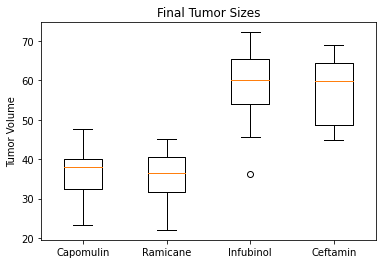

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin = lastdata[lastdata['Drug Regimen'].str.contains('Capomulin')] 
Ramicane = lastdata[lastdata['Drug Regimen'].str.contains('Ramicane')] 
Infubinol = lastdata[lastdata['Drug Regimen'].str.contains('Infubinol')] 
Ceftamin = lastdata[lastdata['Drug Regimen'].str.contains('Ceftamin')] 


sizes = {'Capomulin': Capomulin['Tumor Volume (mm3)'], 'Ramicane': Ramicane['Tumor Volume (mm3)'], 'Infubinol': Infubinol['Tumor Volume (mm3)'], 'Ceftamin': Ceftamin['Tumor Volume (mm3)']}

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Sizes')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(sizes.values())
ax1.set_xticklabels(sizes.keys())


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Size')

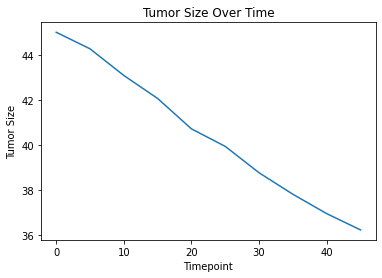

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo_data = data[data['Drug Regimen'].str.contains('Capomulin')]
capo_means = capo_data.groupby('Timepoint').mean().reset_index()
x_axis = capo_means['Timepoint'].tolist()
plt.plot(x_axis, capo_means['Tumor Volume (mm3)'])
plt.title("Tumor Size Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size")

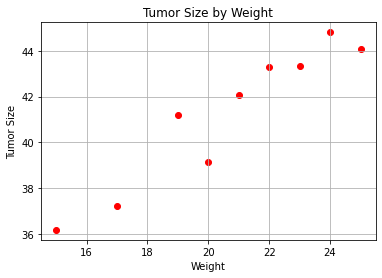

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_weight_means = capo_data.groupby('Weight (g)').mean().reset_index()
plt.scatter(capo_weight_means['Weight (g)'], capo_weight_means['Tumor Volume (mm3)'], color='red')
plt.title("Tumor Size by Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Size")
plt.grid()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capo_data['Weight (g)'],capo_data['Tumor Volume (mm3)'])
print('The corelation coef is '+str(round(correlation[0],2)))
(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_data['Weight (g)'], capo_data['Tumor Volume (mm3)'])
print("Regression Model: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

The corelation coef is 0.53
Regression Model: y = 0.96x + 21.49
